# Key Words
json, reading from file, json lines, dictionary, collections, counter, dictionary items, pandas counting, filling in mising values, horizontal bar plots, groupby()

# Reading JSON Lines

In [110]:
%reset -f
import json
import numpy as np

path="/home/ruslan/Desktop/Applied_Data_Science_With_Python/Python For Data Analysis/Chapter 2/bitly_usagov/bitly_usagov.txt"

# The file contains JSON lines.
# The file needs to be parsed line by line.
# Source 1: https://stackoverflow.com/questions/12451431/loading-and-parsing-a-json-file-with-multiple-json-objects
# Source 2: https://jsonlines.org/
records = [json.loads(line) for line in open(path)]

# Get timezones from the records.
# Note that not all records have the timezone field

list_time_zone = [rec['tz'] for rec in records if 'tz' in rec]                

# Dictionary of Time Zone Counts

In [111]:
# Count the number of time zones using a function
# Return a dictionary of timezone:count

def count_time_zones(list_time_zone):
    
    # Initialize a dictionary
    dict_time_zone_count = {}
    
    for i in list_time_zone:
        if i in dict_time_zone_count:
            
            # increment the count if the time zone is in the dictionary already
            dict_time_zone_count[i]+=1
        else:
            
            # if not in the dictionary, set the count to 1
            dict_time_zone_count[i]=1
            
    return dict_time_zone_count

dict_time_zone_count = count_time_zones(list_time_zone)

print(dict_time_zone_count)

{'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax': 4, 'America/Edmonton': 6,

# First n counts using Pure Python

In [112]:
# Get top n of the counts

def top_n(dict_time_zone_count,n=10):
    value_key_pairs = [(count,tz) for tz, count in dict_time_zone_count.items()]
    value_key_pairs.sort(reverse=True)
    return value_key_pairs[:10]


print(top_n(dict_time_zone_count,10))
    

[(1251, 'America/New_York'), (521, ''), (400, 'America/Chicago'), (382, 'America/Los_Angeles'), (191, 'America/Denver'), (74, 'Europe/London'), (37, 'Asia/Tokyo'), (36, 'Pacific/Honolulu'), (35, 'Europe/Madrid'), (33, 'America/Sao_Paulo')]


# First n Counts using Counter from Collections

In [113]:
# Use counter from Collections.Counter class

from collections import Counter

time_zone_counts = Counter(list_time_zone)

time_zone_counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

# First n Counts using Pandas

In [114]:
import pandas as pd

frame_records = pd.DataFrame(records)

time_zone_counts = frame_records['tz'].value_counts()

time_zone_counts

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
                                  ... 
Asia/Nicosia                         1
Europe/Uzhgorod                      1
America/Argentina/Buenos_Aires       1
America/Argentina/Mendoza            1
Asia/Riyadh                          1
Name: tz, Length: 97, dtype: int64

# Filling the missing and NA values

In [115]:
clean_time_zone = frame_records['tz'].fillna('Missing')

clean_time_zone[clean_time_zone == ''] = 'Unknown'

time_zone_counts = clean_time_zone.value_counts()

time_zone_counts

America/New_York                  1251
Unknown                            521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
                                  ... 
Asia/Nicosia                         1
Europe/Uzhgorod                      1
America/Argentina/Buenos_Aires       1
America/Argentina/Mendoza            1
Asia/Riyadh                          1
Name: tz, Length: 98, dtype: int64

# Plotting Pandas DataFrame

<AxesSubplot:>

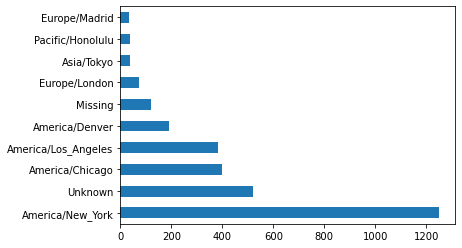

In [116]:
time_zone_counts[:10].plot(kind='barh', rot = 0)

# Parsing strings to get first words in first indices

In [117]:
# value_count() can be applied to python Pandas Series
list_browser_type = pd.Series([x.split()[0] for x in frame_records["a"].dropna()])
print("Using Pandas value_count:",list_browser_type.value_counts())


# Alternativelly, the count can be found using the counter from collections
list_browser_type = [x.split()[0] for x in frame_records["a"].dropna()]
print("Count using Counter:",Counter(list_browser_type))

Using Pandas value_count: Mozilla/5.0                                          2594
Mozilla/4.0                                           601
GoogleMaps/RochesterNY                                121
Opera/9.80                                             34
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         21
Mozilla/6.0                                             5
BlackBerry8520/5.0.0.681                                4
BlackBerry8520/5.0.0.592                                3
Dalvik/1.4.0                                            3
Socialite/7766                                          2
BlackBerry9630/5.0.0.975                                2
Acoon                                                   2
Goldfire                                                2
LG-LG220C[TF268435458416597116000000013524223841]       1
NokiaC3-00/5.0                                          1
Opera/9.64(Windows                            

# Search for Windows / Not Windows

In [118]:
temp_frame_records = frame_records[frame_records['a'].notnull()]
operating_system = np.where(temp_frame_records['a'].str.contains('Windows'),'Windows', 'Not Windows')

# Group by

In [119]:
os_by_tz = temp_frame_records.groupby(['tz', operating_system])
print(os_by_tz.groups)

{('', 'Not Windows'): [8, 28, 29, 46, 57, 71, 75, 83, 87, 118, 119, 208, 250, 252, 296, 304, 326, 332, 340, 350, 358, 359, 363, 364, 370, 372, 374, 382, 385, 388, 426, 439, 462, 471, 478, 486, 494, 500, 520, 521, 533, 537, 544, 553, 592, 595, 597, 600, 603, 624, 645, 646, 671, 693, 711, 723, 727, 734, 743, 760, 780, 783, 818, 851, 857, 870, 890, 900, 910, 947, 956, 964, 1017, 1019, 1043, 1071, 1079, 1096, 1143, 1147, 1163, 1175, 1181, 1188, 1225, 1234, 1249, 1264, 1276, 1282, 1288, 1301, 1304, 1314, 1316, 1317, 1318, 1330, 1338, 1348, ...], ('', 'Windows'): [7, 9, 34, 35, 37, 47, 53, 66, 84, 94, 105, 129, 152, 158, 169, 170, 173, 175, 181, 182, 187, 202, 215, 233, 255, 257, 264, 313, 352, 371, 378, 380, 381, 393, 403, 408, 474, 475, 508, 516, 524, 532, 538, 554, 581, 598, 608, 617, 618, 621, 631, 644, 648, 663, 668, 699, 704, 740, 765, 769, 775, 806, 808, 826, 844, 845, 846, 849, 854, 855, 867, 869, 893, 895, 897, 916, 917, 919, 931, 939, 944, 959, 960, 966, 993, 1035, 1056, 1085, 1091